COMP263_GROUP5_PROJECT _BRAIN_TUMOR_DETECTION.
TEAM :
Juan Arevalo
Ruben Ormeno
Samantha Ortiz de Foronda
Mariela Ramos Vila
Jose Muniz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [3]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# **One Hot Encoding for the Target Classes**

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# **Creating 3 Important Lists**
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor  

In [6]:
from PIL import Image
import numpy as np
import os

data = []
paths = []
result = []

# Correct the path according to where your images are stored in Google Drive
#directory_path = '/brain-image/YES/'  # Update this path as necessary

for r, d, f in os.walk(r'../content/drive/MyDrive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            file_path = os.path.join(r, file)
            #print(file_path)  # This will print the path of each .jpg file found
            paths.append(file_path)

# Assuming 'encoder' is defined elsewhere in your notebook and ready to use
for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if img.shape == (128, 128, 3):
        data.append(img)
        result.append(encoder.transform([[0]]).toarray())

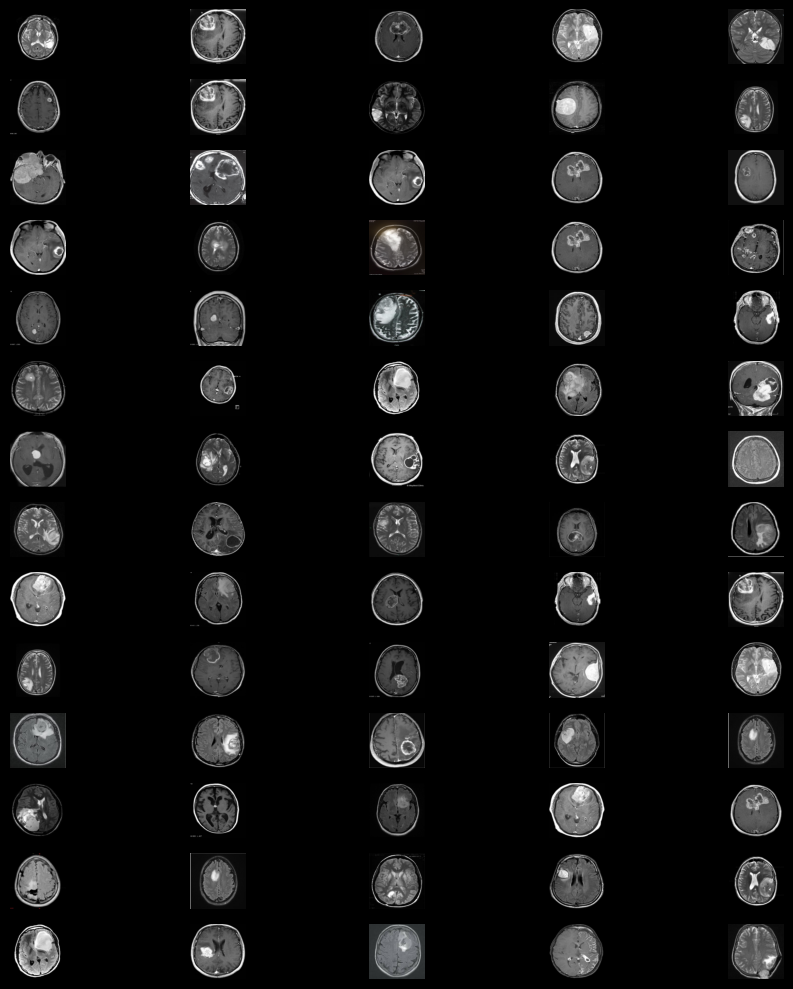

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Assuming 'data' is your list of image arrays
# Ensure you've already populated 'data' with your images before this point

# Plotting the images in 5 columns
num_images = len(data)
num_columns = 5
num_rows = num_images // num_columns + (1 if num_images % num_columns else 0)  # Calculate the required number of rows

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_columns, i + 1)  # Adjust for 5 columns and calculated number of rows
    plt.imshow(data[i])
    plt.axis('off')
plt.tight_layout()  # Adjust layout to not overlap images
plt.show()

In [8]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"../content/drive/MyDrive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [9]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [11]:
result = np.array(result)
result = result.reshape(139,2)
result.shape

(139, 2)

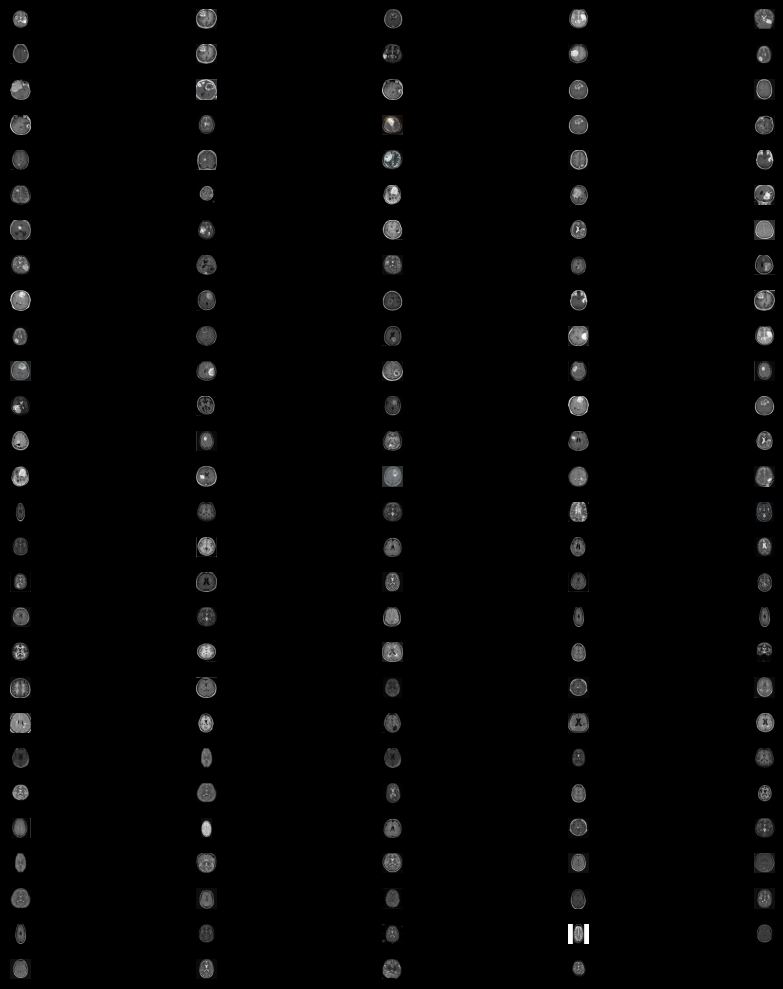

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Assuming 'data' is your list of image arrays
# Ensure you've already populated 'data' with your images before this point

# Plotting the images in 5 columns
num_images = len(data)
num_columns = 5
num_rows = num_images // num_columns + (1 if num_images % num_columns else 0)  # Calculate the required number of rows

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_columns, i + 1)  # Adjust for 5 columns and calculated number of rows
    plt.imshow(data[i])
    plt.axis('off')
plt.tight_layout()  # Adjust layout to not overlap images
plt.show()

# **Splitting the Data into Training & Testing**

In [13]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=69)

# **Model Building**

---
The model apply is similar to vanilla CNN, because The architecture of a vanilla CNN typically consists of multiple convolutional layers, followed by pooling layers, and one or more fully-connected layers
. The convolutional layers are responsible for extracting features from the input data, while the pooling layers are used to downsample the feature maps and reduce the dimensionality of the data
. The fully-connected layers are used to perform the final classification or regression task

In [29]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics=['accuracy'])
print(model.summary())
model.save('classif_keras.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
y_train.shape

(111, 2)

In [22]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 2s 190ms/step - loss: 30.2001 - accuracy: 0.5495 - val_loss: 12.7605 - val_accuracy: 0.6429
Epoch 2/30
3/3 [==============================] - 0s 85ms/step - loss: 10.2173 - accuracy: 0.7658 - val_loss: 13.5155 - val_accuracy: 0.6071
Epoch 3/30
3/3 [==============================] - 0s 82ms/step - loss: 5.0381 - accuracy: 0.7658 - val_loss: 8.8728 - val_accuracy: 0.6071
Epoch 4/30
3/3 [==============================] - 0s 83ms/step - loss: 2.1408 - accuracy: 0.9099 - val_loss: 3.7117 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 0s 82ms/step - loss: 2.0796 - accuracy: 0.8649 - val_loss: 2.3826 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 0s 82ms/step - loss: 2.0730 - accuracy: 0.8829 - val_loss: 1.2789 - val_accuracy: 0.8214
Epoch 7/30
3/3 [==============================] - 0s 82ms/step - loss: 1.6510 - accuracy: 0.8739 - val_loss: 2.3275 - val_accuracy: 0.7143
Epoch 8/30
3/3 [======

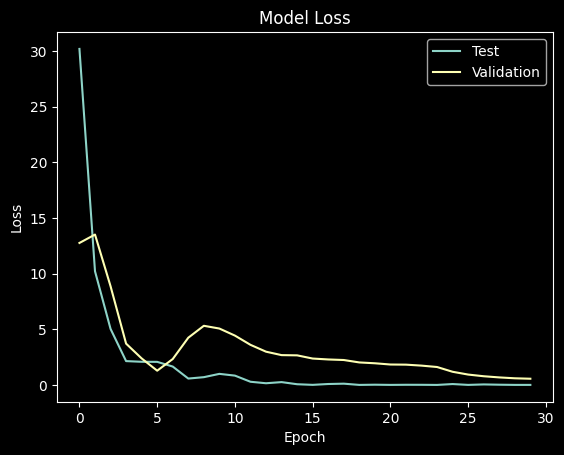

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [24]:
test_error, test_accuracy = model.evaluate(x_train, y_train, verbose=2)
test_error, test_accuracy

4/4 - 0s - loss: 0.0476 - accuracy: 0.9640 - 65ms/epoch - 16ms/step


(0.047627367079257965, 0.9639639854431152)

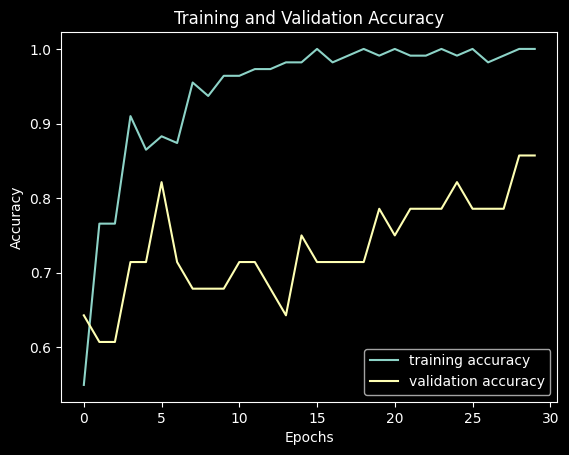

In [25]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

94.11318302154541% Confidence This Is No, Its not a tumor


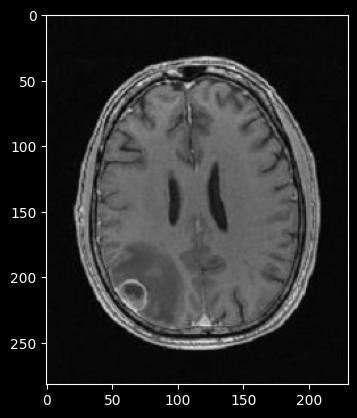

In [32]:
from matplotlib.pyplot import imshow
img = Image.open(r'../content/drive/MyDrive/brain_tumor_dataset/no/N19.JPG')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


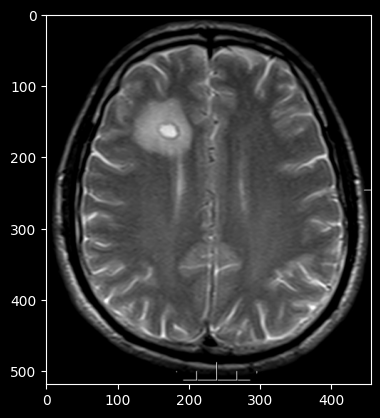

In [28]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/drive/MyDrive/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))